# <span style='color:#001f3f'> Dinámica de modelos epidemiológicos sujeto a intervenciones </span>
## <span style='color:#0074D9'>Universidad Nacional de Colombia</span>
### <span style='color:#0074D9'>Modelo SIR Sin Demografía</span>

En la presente entrega se dan a conocer los resultados del modelo $SIR$ sometido a unas invertenvenciones definidas.

### <span style='color:#001f3f'>1. Introducción</span>

En esta sección se da una introducción práctica al modelo de transmisión $SIR$ y sus consecuencias. Se seguirá la exposición dada en el segundo capítulo del libro [_Modeling Infectious Diseases in Humans and Animals_](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1541-0420.2008.01082_7.x) de los autores Matt J. Keeling y Pejman Rohani. 

#### <span style='color:#0074d9'>1.1. Formulación del Modelo</span>

El modelo $SIR$ es un modelo determinístico utilizado para modelar la transmisión de infecciones agudas. Se asume que el patógeno causa una infección seguida de una inmunidad de por vida. Este modelo, categoriza en el tiempo a los huéspedes de una enfermedad como 

1. Susceptibles ($S$): Aquellos huespedes que no han sido expuestos a un patógeno
2. Infectados ($I$): Aquellos individuos de la población que han sido colonizados por el patógeno
3. Retirados ($R$): Aquellos individuos que se han recuperado de la infección o que mueren a causa de la misma
    
Ahora que se han definido las categorías, nos preguntamos acerca de como los individuos se mueven de una a otra. En el caso más simple (ignorando los efectos demográficos), solo se tienen las transiciones $S \rightarrow I$ y $I \rightarrow R$. La segunda transición es la más comprensible: Para las infecciones agudas, se observa que el tiempo en un estado infeccioso se distribuye al rededor de un valor medio, que se estima a partir de datos clínicos. Desde la perspectiva del modelo, esto se traduce en la probabilidad de que un individuo se mueva desde el estado $I$ al $R$ dependiendo de cuanto tiempo ha estado en $I$. El modelo $SIR$ hace el supuesto de que la tasa de recuperación $\gamma$ (que es el recíproco del periodo infeccioso) es constante.

La progresión de $S$ a $I$ claramente necesita de la transmisión de una enfermedad, lo cual se determina a partir de tres factores:

1. La prevalencia de los infectados
2. La probabilidad de transmisión dado un contacto
3. La estructura del contacto (Es diferente la estructura de contacto de una gripe y la del VIH)

Para un patógeno transmisible directamente, se requiere un contacto entre un individuo susceptible y otro infectado. Note que la probabilidad de este suceso se define a partir de los niveles de $S$ e $I$. 

El hecho de que el nivel de individuos infecciosos afecta la tasa a la cual los individuos susceptibles se mueven a la categoría de infectados, se simboliza con la flecha gris punteada.

Para la formulación matemática del modelo, se inicia definiendo la _fuerza de infección_ , $\lambda$, la cual se define como la tasa _per capita_ a la cual los individuos susceptibles contraen la infección. Es decir, la tasa a la cual se producen los nuevos infectados es $\lambda X$, donde $X$ es el número de individuos en la clase $S$. Esta fuerza de infección es intuitivamente proporcional al número de individuos infectados. Por lo tanto, dos posibilidades aparecen:

1. $\lambda = \frac{\beta Y}{N}$ (modelo dependiente de la frecuencia) ($Y$ es el número de individuos en la clase $I$)
2. $\lambda = \beta Y$ (modelo dependiente de la densidad)

Es importante distinguir entre estos dos supuestos básicos en términos de la estructura de contactos dentro de una población. La transmisión dependiente de la frecuencia refleja la situación donde el contacto es independiente del tamaño de la población, mientras que para los modelos dependientes de la densidad, asume que el tamaño de la población influye en el número de contactos. Se ha visto que el supuesto $\lambda = \frac{\beta Y}{N}$ es más adecuado para poblaciones humanas, mientras que el supuesto $\lambda = \beta Y$ es más adecuado para poblaciones vegetales y animales. Note que para un modelo que ignora el crecimiento demográfico se aprecia que el término $1/N$ se absorve parámetro $\beta$, dejando los modelos dependientes de la frecuencia y dependientes de la densidad escencialmente equivalentes.

Como una simplificación de nuestra notación, es conveniente definir el número de individuos susceptibles, infectados y retirados en términos de proporciones poblacionales $S = \frac{X}{N}$, $I = \frac{Y}{N}$, $R = \frac{Z}{N}$ ($Z$ es la cantidad de individuos retirados). Así, las ecuaciones de nuestro modelo quedan descritas a continuación

\begin{align}
\frac{dS}{dt} &= - \beta S I,\ \ \ \ \ \ \ \ \  (1) \\
\frac{dI}{dt} &= \beta S I - \gamma I,\ \ \ (2) \\
\frac{dR}{dt} &= \gamma I. \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ (3)
\end{align} 

Donde $\gamma$ es la tasa de recuperación (es decir $\frac{1}{\gamma}$ es el periodo infeccioso). El sistema de ecuaciones $(1)$ - $(3)$, aunque simple, no posee solución analítica y debe ser resuelto por medio de métodos numéricos (método de Euler y Runge - Kutta, por ejemplo). Este modelo hace uso de los siguientes supuestos:


1. Todas las personas en una población se comportan de la misma manera
2. Todas los individuos tienen la misma probabilidad de ser susceptibles a una enfermedad dada
3. Todas las personas se relacionan con otras personas de manera aleatoria

#### <span style='color:#0074d9'>1.2. Consecuencias del Modelo</span>

#### <span style='color:#FF851B'>1.2.1. El Fenómeno del Punto de Corte</span>

Primero se consideran las etapas iniciales después de que una cantidad $I(0)$ de individuos infectados se introducen a una población. ¿Qué factores determinan que una epidemia ocurrirá o si la infección fallará en invadir? Para responder la pregunta, se inicia reescribiendo la ecuación $(2)$ como sigue

$$
\frac{dI}{dt} = I (\beta S - \gamma).
$$

Si la fracción inicial de susceptibles ($S(0)$) es menor que $\frac{\gamma}{\beta}$, entonces $\frac{dI}{dt} < 0$ y la infección falla en invadir a la poblacción. La cantidad $\frac{\gamma}{\beta}$ se conoce como la tasa de remoción y su inverso $\frac{\beta}{\gamma}$ se conoce como la tasa básica de reproducción, denotada $R_0$ y es el número promedio de casos secundarios que surgen de un caso primario en una población susceptible durante el periodo infeccioso del último. Matemáticamente, se puede calcular $R_0$ como la tasa a la cual nuevos casos se producen a partir de un individuo infeccioso. Se puede utilizar $R_0$ para expresar el fenómeno del punto de corte: asumiendo que $S(0) \approx 1$ un patógeno invade una población si $R_0 > 1$.

#### <span style='color:#FF851B'>1.2.2. Agotamiento de una Epidemia</span>

De las ecuaciones $(1)$ y $(3)$ se puede inferir que 


\begin{align}
\frac{dS}{dR} &= - \frac{\beta S}{\gamma}\\
&= - R_0 S.
\end{align}

La solución de esta ecuación es $S(t) = S(0) \exp(-R(t) R_0)$ (asumiendo $R(0) = 0$). Esta observación nos ayuda a establecer el número total de individuos que fueron infectados por el patógeno al término de la epidemia ($R(\infty)$) por medio de la siguiente relación

\begin{equation}
S(\infty) = 1 - R(\infty) = S(0)\exp(-R(\infty) R_0) \ \ \ (4)
\end{equation}

Esta ecuación no lineal se debe solucionar por medio de un método numérico como Newton-Raphson.

### <span style='color:#001f3f'>2. Resultados</span>


#### <span style='color:#0074d9'>2.1. Código</span>

El siguiente código en lenguaje Python crea el modelo ```SIR``` con los detalles:

1. `derive_sir` Plantea el sistema de ecuaciones $(1)$ - $(3)$
2. `soln` Resuelve el sistema de ecuaciones con un método de Runge-Kutta. Ver [documentación](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) para mayor información. Requiere las proporciones iniciales $I(0)$ y $R(0)$ y un $T$ (máximo número de días)
4. `plotdata` Grafica la solución obtenida con `solve_SIR`.

A continuación se muestra el código y vemos un ejemplo de uso.

In [1]:
# Algunas ideas tomadas de https://jckantor.github.io/CBE30338/03.09-COVID-19.html

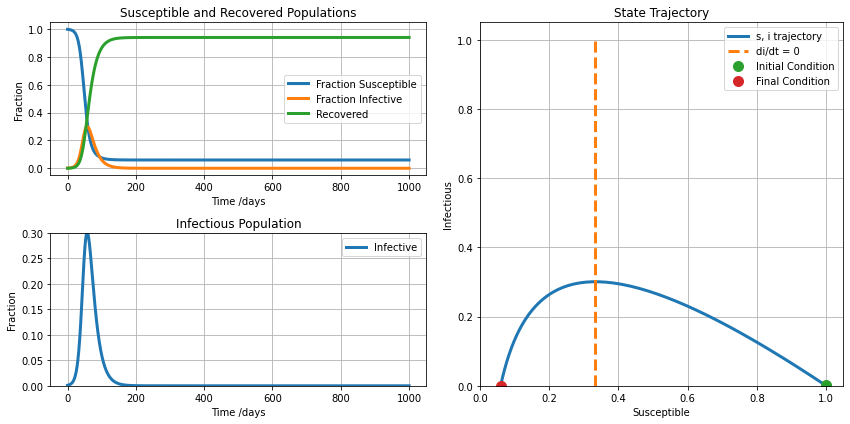

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# parametros
R0 = 3
t_infective = 15

# condiciones iniciales de poblacion
i_initial = 1e3/1e6
r_initial = 1e2/1e6
s_initial = 1 - i_initial - r_initial

gamma = 1/t_infective
beta = R0*gamma

# SIR model differential equations.
def deriv_sir(x, t, beta, gamma):
    s, i, r = x
    dsdt = -beta * s * i
    didt = beta * s * i - gamma * i
    drdt =  gamma * i
    return [dsdt, didt, drdt]

t = np.linspace(0, 1000, 1000)
x_initial = s_initial, i_initial, r_initial
soln = odeint(deriv_sir, x_initial, t, args=(beta, gamma))
s, i, r = soln.T
e = None

def plotdata(t, s, i, e=None):
    # plot the data
    fig = plt.figure(figsize=(12,6))
    ax = [fig.add_subplot(221, axisbelow=True), 
          fig.add_subplot(223),
          fig.add_subplot(122)]

    ax[0].plot(t, s, lw=3, label='Fraction Susceptible')
    ax[0].plot(t, i, lw=3, label='Fraction Infective')
    ax[0].plot(t, r, lw=3, label='Recovered')
    ax[0].set_title('Susceptible and Recovered Populations')
    ax[0].set_xlabel('Time /days')
    ax[0].set_ylabel('Fraction')

    ax[1].plot(t, i, lw=3, label='Infective')
    ax[1].set_title('Infectious Population')
    if e is not None: ax[1].plot(t, e, lw=3, label='Exposed')
    ax[1].set_ylim(0, 0.3)
    ax[1].set_xlabel('Time /days')
    ax[1].set_ylabel('Fraction')

    ax[2].plot(s, i, lw=3, label='s, i trajectory')
    ax[2].plot([1/R0, 1/R0], [0, 1], '--', lw=3, label='di/dt = 0')
    ax[2].plot(s[0], i[0], '.', ms=20, label='Initial Condition')
    ax[2].plot(s[-1], i[-1], '.', ms=20, label='Final Condition')
    ax[2].set_title('State Trajectory')
    ax[2].set_aspect('equal')
    ax[2].set_ylim(0, 1.05)
    ax[2].set_xlim(0, 1.05)
    ax[2].set_xlabel('Susceptible')
    ax[2].set_ylabel('Infectious')

    for a in ax: 
        a.grid(True)
        a.legend()

    plt.tight_layout()
    
plotdata(t, s, i)

Ahora agregamos una variable de control $u$.La interpretación de esta variable de control se refiere a las intervenciones que se puedan tener sobre los susceptibles para poder evitar su transición a la población infectada. Cuando $u=1$ se tiene control total y sin control cuando $u=0$. El sistema SIR queda ahora definido de la siguiente forma.
\begin{align}
\frac{dS}{dt} &= -(1-u)\beta S I,\ \ \ \ \ \ \ \ \  (1) \\
\frac{dI}{dt} &= (1-u)\beta S I - \gamma I,\ \ \ (2) \\
\frac{dR}{dt} &= \gamma I. \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ (3)
\end{align} 


In [3]:
def deriv_sir_control(x, t, beta, gamma,u):
    s, i, r = x
    dsdt = -(1-u)*beta * s * i
    didt = (1-u)*beta* s * i- gamma * i
    drdt =  gamma * i
    return [dsdt, didt, drdt]

# Politica 1: matener un nivel fijo de control, es decir, $u$ constante 

In [4]:
R0 = 3
t_infective = 13

gamma = 1/t_infective
beta = R0*gamma

# condiciones ininiciales de poblacion

i_0 = 1e3/1e6
r_0 = 1e2/1e6
s_0 = 1 - i_0 - r_0

# periodo de observacion

t = np.linspace(0, 180, 2000)
e = None

In [5]:
np.linspace(0,0.7,10)

array([0.        , 0.07777778, 0.15555556, 0.23333333, 0.31111111,
       0.38888889, 0.46666667, 0.54444444, 0.62222222, 0.7       ])

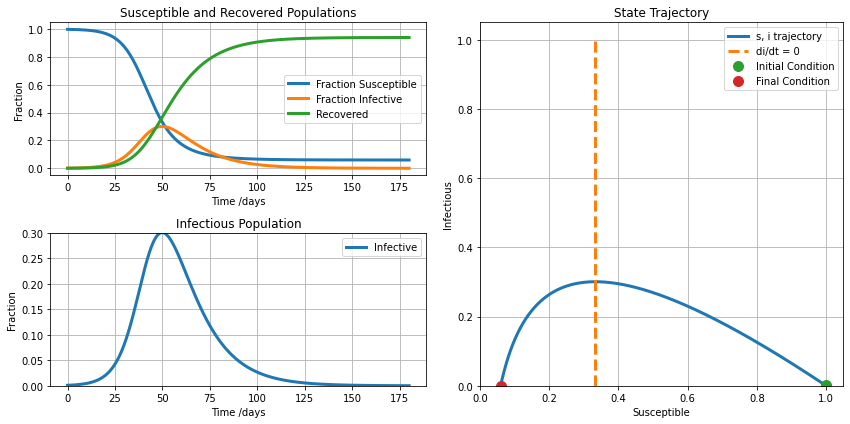

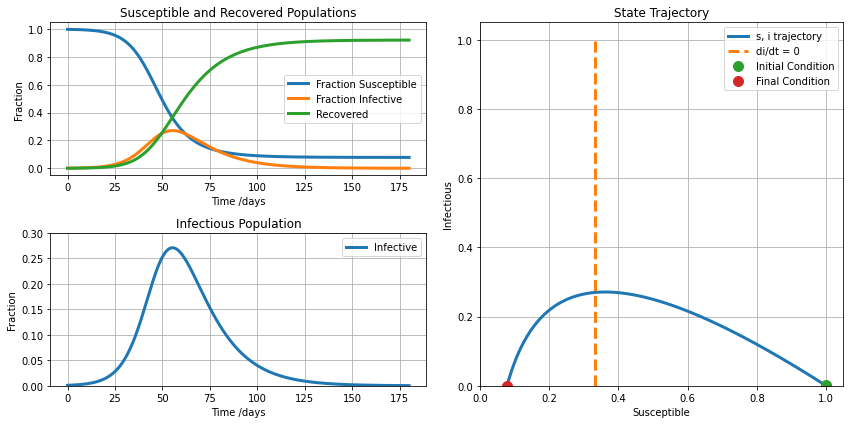

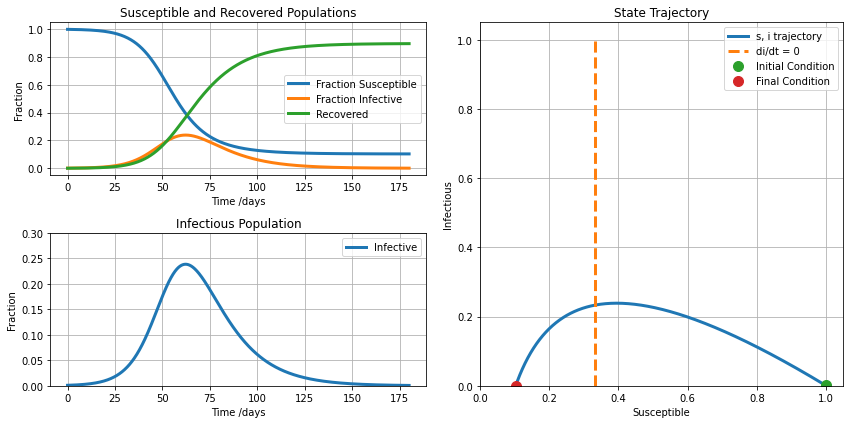

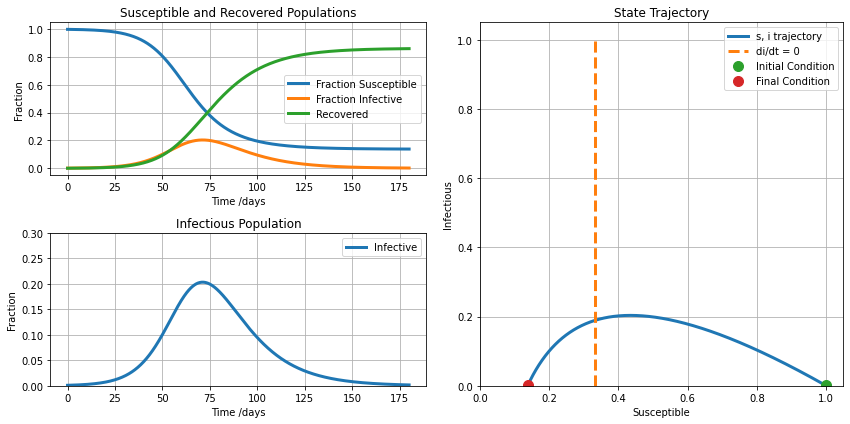

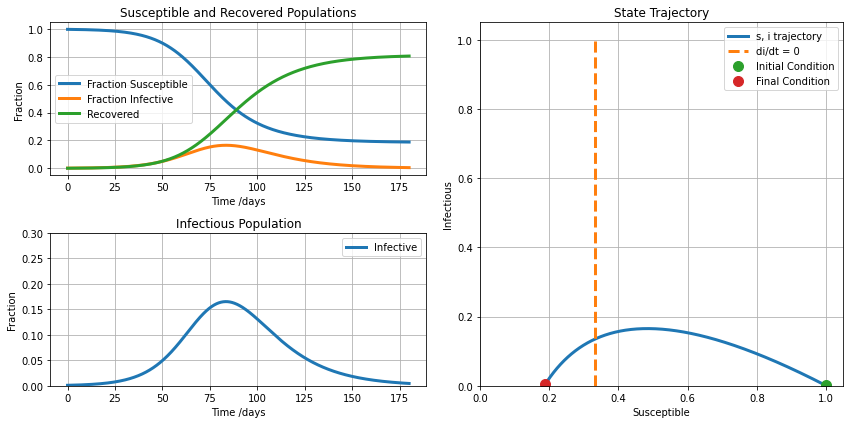

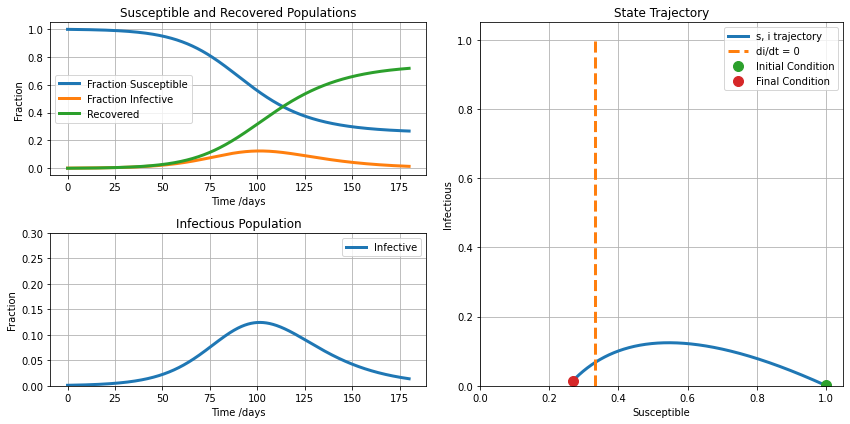

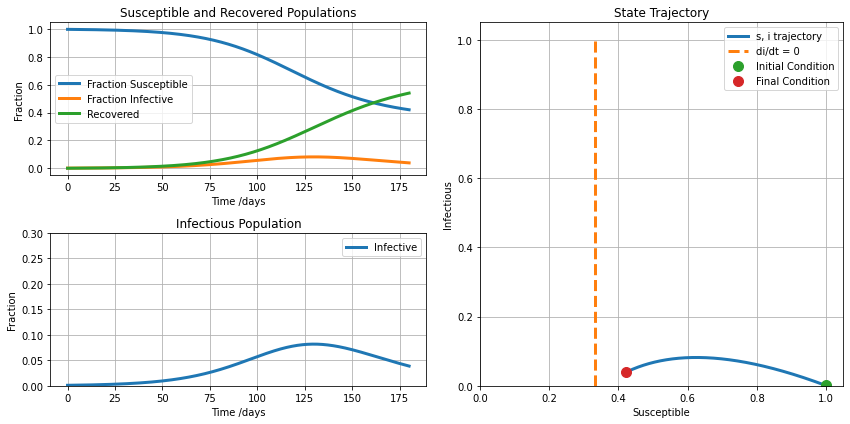

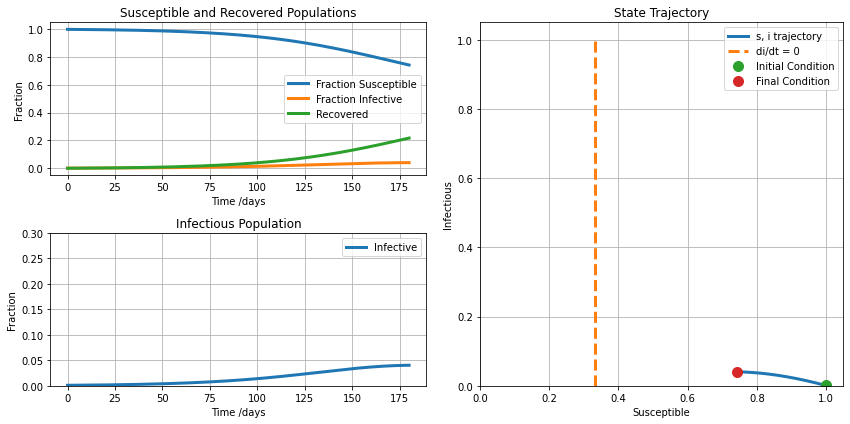

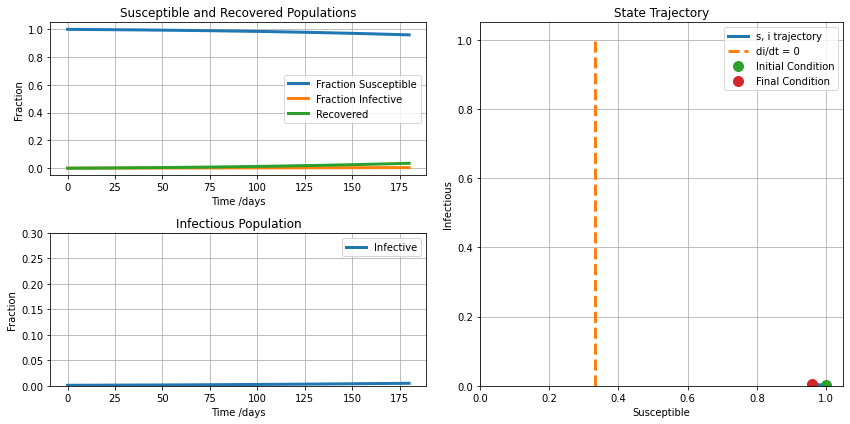

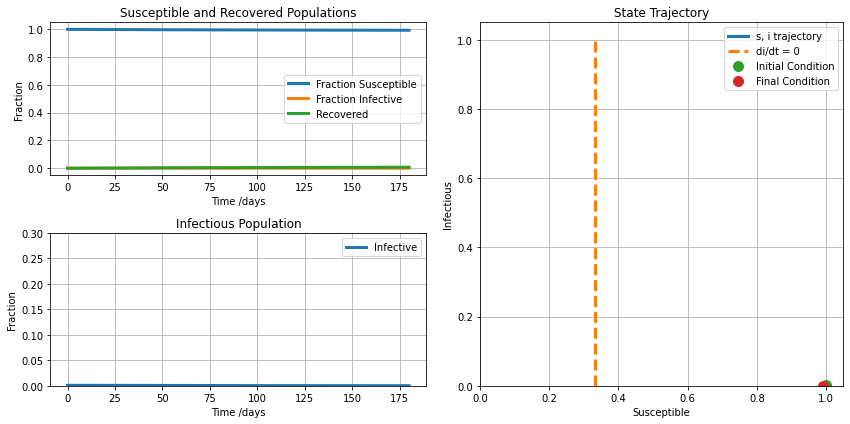

In [6]:
infectados = []
controles = []
for u in np.linspace(0,0.7,10):
    x_0 = s_0, i_0, r_0
    soln = odeint(deriv_sir_control, x_0, t, args=(beta, gamma,u))
    s, i, r = soln.T
    infectados.append(i)
    controles.append(round(u,2))
    plotdata(t, s, i)

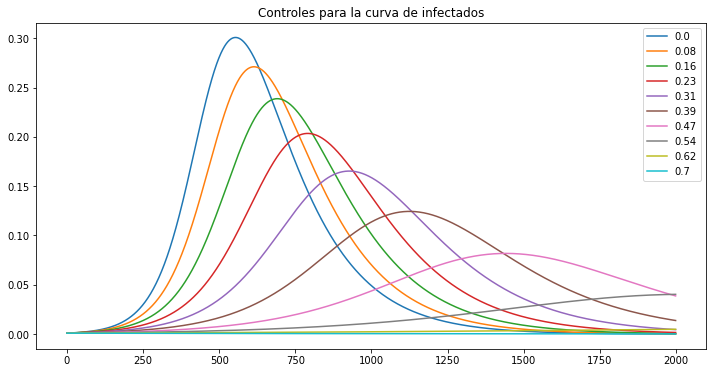

In [7]:
plt.figure(figsize=(12,6))

for i in range(0, len(infectados)):
    plt.plot(infectados[i], label=str(controles[i]))
plt.title('Controles para la curva de infectados')
plt.legend()
plt.show()

# Politica 2: Anticiparse $k$ pasos al máximo de infectados y controlar con $u$:

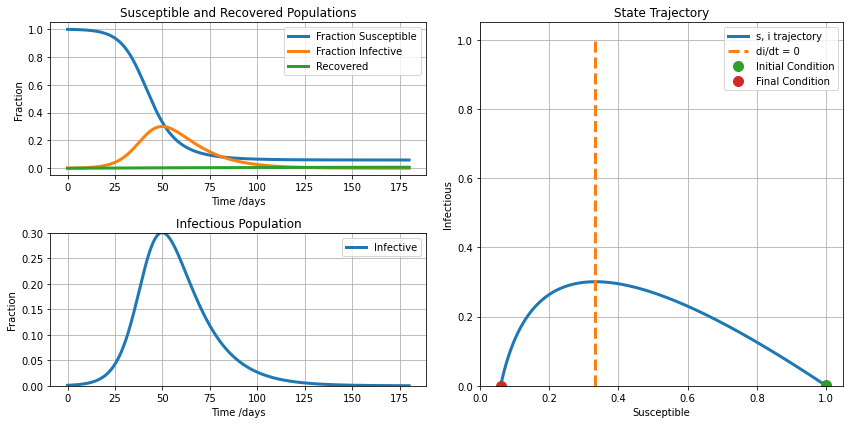

In [8]:
u = 0

x_0 = s_0, i_0, r_0
t = np.linspace(0, 180, 2000)
soln = odeint(deriv_sir_control, x_0, t, args=(beta, gamma,u))
s_0, i_0, r_0 = soln.T

plotdata(t, s_0, i_0)

# Cómo decidir cuando aplicar las intervenciones?

Idea 1: La derivada de la curva de infectados

In [9]:
from numpy import diff
dx = 0.1
y = [1, 2, 3, 4, 4, 5, 6]
dy = diff(y)/dx
print(dy)

[10. 10. 10.  0. 10. 10.]


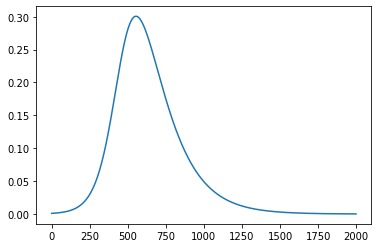

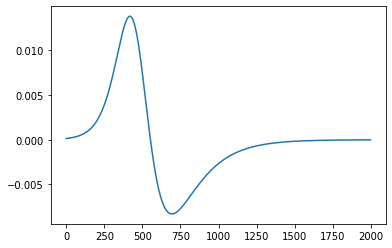

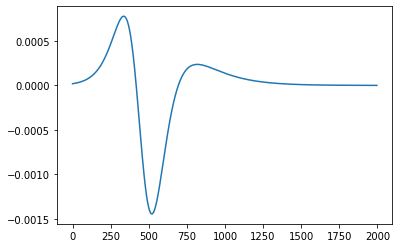

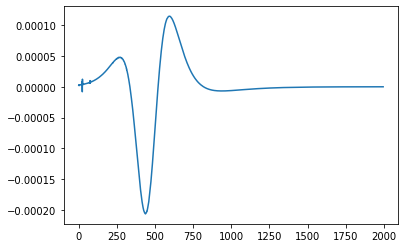

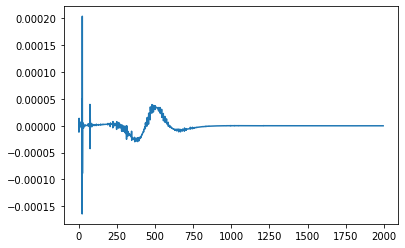

In [10]:
for i in range(0,5):
    plt.plot(i_0)
    plt.show()
    dy = diff(i_0)/dx
    i_0 = dy

Dado un punto $x$ en la curva de infectados, por ejemplo el máximo, intervenir $k$ pasos atrás de $x$

In [11]:
infectados_t = soln.T[1]
print('rango de tiempo:', len(infectados_t))

rango de tiempo: 2000


In [12]:
print('valor maximo de infectados', max(infectados_t))

valor maximo de infectados 0.30072914147194274


In [13]:
print('tiempo en el que se da el maximo', np.where(infectados_t==max(infectados_t)))

tiempo en el que se da el maximo (array([554]),)


In [14]:
# diferentes politicas:
# dado ese max, actuar en el max? actuar antes?, antes cuando?

In [15]:
# defininos adelanto como el tiempo en el que se desea actuar antes del maximo de infectados

In [16]:
np.where(infectados_t==max(infectados_t))[0][0]

554

In [17]:
adelanto=392

In [18]:
tiempo_respuesta = np.where(infectados_t==max(infectados_t))[0][0]-adelanto
infectados_accion = infectados_t[:tiempo_respuesta]


In [19]:
len(soln.T[1])

2000

In [20]:
def plot_action(all_infected, infected_action):
    plt.plot(all_infected)
    plt.plot(infected_action)
    plt.show()

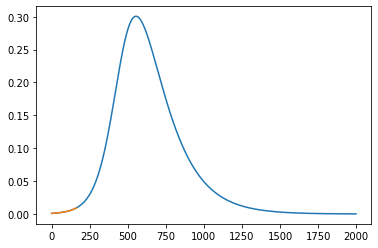

In [21]:
plot_action(soln.T[1],infectados_accion)

504


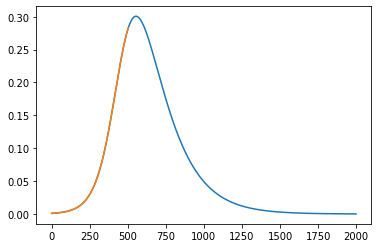

392


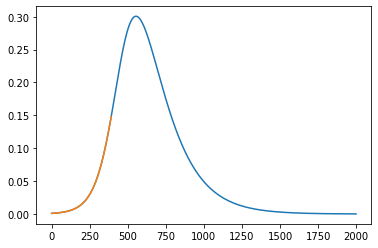

279


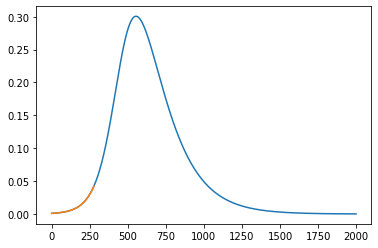

167


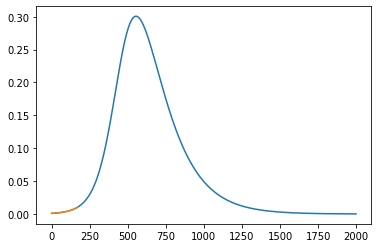

54


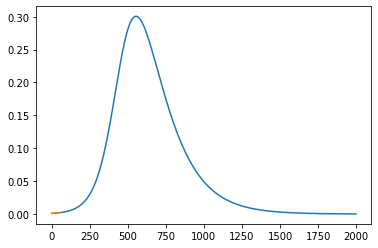

In [22]:
for adelanto in np.linspace(50,500,5):
    tiempo_respuesta = np.where(infectados_t==max(infectados_t))[0][0]-int(adelanto)
    print(tiempo_respuesta)
    infectados_accion = infectados_t[:tiempo_respuesta]
    plt.plot(soln.T[1])
    plt.plot(infectados_accion)
    plt.show()

In [23]:
print('valor maximo de infectados', max(infectados_t))

valor maximo de infectados 0.30072914147194274


In [24]:
print('tiempo en el que se da el maximo', np.where(infectados_t==max(infectados_t)))

tiempo en el que se da el maximo (array([554]),)


In [25]:
adelanto = 150

In [26]:
tiempo_respuesta = np.where(infectados_t==max(infectados_t))[0][0]-adelanto
infectados_accion = infectados_t[:tiempo_respuesta]

In [27]:
tiempo_accion = len(infectados_accion)
tiempo_accion

404

In [28]:
suceptibles_accion = s_0[tiempo_accion]
infectados_accion = i_0[tiempo_accion]
recuperados_accion = r_0[tiempo_accion]

In [29]:
suceptibles_accion

0.7297883152503356

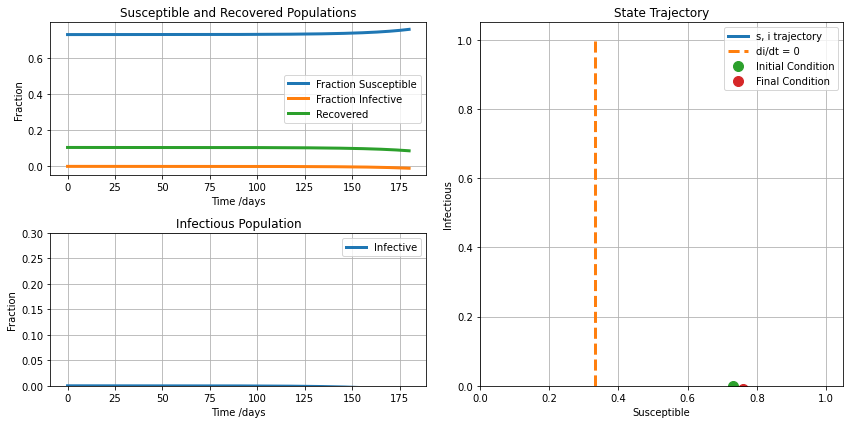

In [30]:
# initial number of infected and recovered individuals
i_1 = infectados_accion
r_1 = recuperados_accion
s_1 = suceptibles_accion

u = 0.3

t = np.linspace(0, 180, 2000)
x_1 = s_1, i_1, r_1
soln = odeint(deriv_sir_control, x_1, t, args=(beta, gamma,u))
s, i, r = soln.T

plotdata(t, s, i)

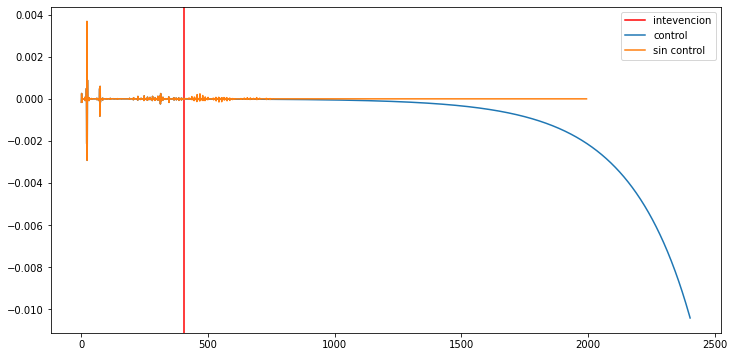

In [31]:
infectados_con_control = np.append(i_0[:tiempo_accion],i)
plt.figure(figsize=(12,6))
plt.axvline(x=tiempo_accion,color='r',label='intevencion')
plt.plot(infectados_con_control,label='control')
plt.plot(i_0, label='sin control')
plt.legend()
plt.show()